Copy and paste the following 3 cells and run it to gather the data and unzip it without downloading it locally.

In [1]:
!pip install -q kaggle

!mkdir -p ~/.kaggle
                                  
!cp kaggle.json ~/.kaggle/      #   (!cp [   API token file name   ] ~/.kaggle/)   
## paste your kaggle API JSON file in the directory before running code cells

!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d ryanholbrook/car-or-truck

car-or-truck.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
from zipfile import ZipFile
zf = ZipFile('car-or-truck.zip', 'r')
zf.extractall('/content')
zf.close()

# Libraries : 
---
As this is a deep learning binary classification task we need some data rocessing libraries , and the deep learning framworks and the confusion matrix plotter libraries.

In [4]:
# for data processing

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os


# for data pipeline --------------------

from sklearn.model_selection import train_test_split
from sklearn.metrics import*
import matplotlib.pyplot as plt
from sklearn.model_selection import*
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

#deep learning libraries

import tensorflow as tf
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
print('version of tensorflow',tf.__version__)

# for confusion matrix plotting
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix,confusion_matrix

version of tensorflow 2.4.0


# Primary data visualization:
---

In [5]:
os.listdir('train/')

['Truck', 'Car']

In [6]:
os.listdir('valid/')

['Truck', 'Car']

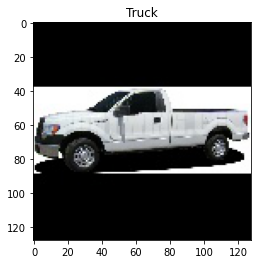

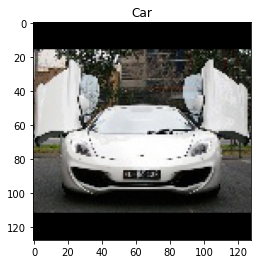

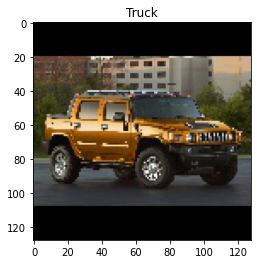

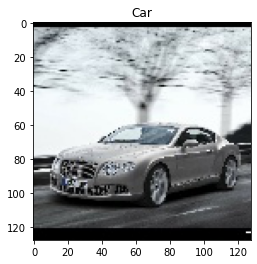

In [7]:
for x in ['train/','valid/']:
  for l in ['Truck/','Car/']:
    for ll in os.listdir(x+l):
      link=x+l+ll
      img=mpimg.imread(link)
      plt.title(l[:-1])
      plt.imshow(img)
      plt.show()
      break
    

Dataframe Generator :
---

In [9]:
x='train/'
arr=[]
df=[]
for l in ['Truck/','Car/']:
  for ll in os.listdir(x+l):
    link=x+l+ll
    img=mpimg.imread(link)
    if l== 'Truck/':
      arr.append(int(1))
    else :
      arr.append(int(0))
    img=resize(img,(64,64),anti_aliasing=True)  # resizes the images in 64x64 shape
    img=img.reshape(4096*3)    # flattens the image to append in the array
    df.append(img)
df=pd.DataFrame(df)
arr=pd.DataFrame({'label':arr})     

df=pd.concat([arr,df],axis=1)      # creates the final dataframe
df.head()

,label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,12248,12249,12250,12251,12252,12253,12254,12255,12256,12257,12258,12259,12260,12261,12262,12263,12264,12265,12266,12267,12268,12269,12270,12271,12272,12273,12274,12275,12276,12277,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
train=df

In [11]:
x='valid/'
arr=[]
df=[]
for l in ['Truck/','Car/']:
  for ll in os.listdir(x+l):
    link=x+l+ll
    img=mpimg.imread(link)
    if l== 'Truck/':
      arr.append(int(1))
    else :
      arr.append(int(0))
    img=resize(img,(64,64),anti_aliasing=True)
    img=img.reshape(4096*3)
    df.append(img)
df=pd.DataFrame(df)
arr=pd.DataFrame({'label':arr})

df=pd.concat([arr,df],axis=1)
df.head()

,label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,12248,12249,12250,12251,12252,12253,12254,12255,12256,12257,12258,12259,12260,12261,12262,12263,12264,12265,12266,12267,12268,12269,12270,12271,12272,12273,12274,12275,12276,12277,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
test=df

# Trainable data processing :
---

In [13]:
train.shape

(5117, 12289)

In [14]:
test.shape

(5051, 12289)

In [22]:
X_train=train.drop('label',1)
y_train=train['label']

In [23]:
X_test=test.drop('label',1)
y_test=test['label']

X_test,X_val,y_test,y_val=train_test_split(X_test,y_test,random_state=0,test_size=0.5,stratify=y_test)    

# splits the dataframe into test and validation for checking overfitting/ underfitting nature of model

X_test.shape,X_val.shape,y_test.shape,y_val.shape

((2525, 12288), (2526, 12288), (2525,), (2526,))

In [24]:
y_train.value_counts()

0    2961
1    2156
Name: label, dtype: int64

In [25]:
y_val.value_counts()

0    1461
1    1065
Name: label, dtype: int64

In [26]:
y_test.value_counts()

0    1461
1    1064
Name: label, dtype: int64

we can see the car and trucks are quite same in all the dataframes and this can help us gather better model performance.

In [27]:
X_train=X_train.to_numpy()
X_val=X_val.to_numpy()
X_test=X_test.to_numpy()
y_train=y_train.to_numpy()
y_val=y_val.to_numpy()
y_test=y_test.to_numpy()

In [30]:
X_train=X_train.reshape(5117,64,64,3)
X_val=X_val.reshape(2526,64,64,3)
X_test=X_test.reshape(2525,64,64,3)   # changing them into 4d to feed into the model.
y_train=y_train.reshape(5117,1)
y_val=y_val.reshape(2526,1)
y_test=y_test.reshape(2525,1)

# Model Generation and Compiling :
---

In [39]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=X_train[0].shape))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 26, 26, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 64)       

In [41]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Model Fitting :
---

1. Batch size : 20
2. Epoch : 10
3. Optimizer : Adam
4. Loss function : BCE-Loss
5. Metrics : Accuracy
7. Validation set taken : YES

In [42]:
hist=model.fit(X_train,y_train,batch_size=20,epochs=10,verbose=1,validation_data=(X_val,y_val))

Epoch 1/10
256/256 [==============================] - 94s 363ms/step - loss: 0.6780 - accuracy: 0.5809 - val_loss: 0.6465 - val_accuracy: 0.6271
Epoch 2/10
256/256 [==============================] - 92s 360ms/step - loss: 0.6385 - accuracy: 0.6293 - val_loss: 0.6087 - val_accuracy: 0.6631
Epoch 3/10
256/256 [==============================] - 92s 360ms/step - loss: 0.5995 - accuracy: 0.6783 - val_loss: 0.5516 - val_accuracy: 0.7257
Epoch 4/10
256/256 [==============================] - 93s 364ms/step - loss: 0.5607 - accuracy: 0.7253 - val_loss: 0.5141 - val_accuracy: 0.7589
Epoch 5/10
256/256 [==============================] - 93s 362ms/step - loss: 0.4845 - accuracy: 0.7781 - val_loss: 0.4260 - val_accuracy: 0.8084
Epoch 6/10
256/256 [==============================] - 92s 358ms/step - loss: 0.4129 - accuracy: 0.8115 - val_loss: 0.4106 - val_accuracy: 0.8100
Epoch 7/10
256/256 [==============================] - 93s 363ms/step - loss: 0.3443 - accuracy: 0.8544 - val_loss: 0.3554 - val_ac

# Final visualizations :
---
1. checking the accuracy and the loss curve to find model's preformance.

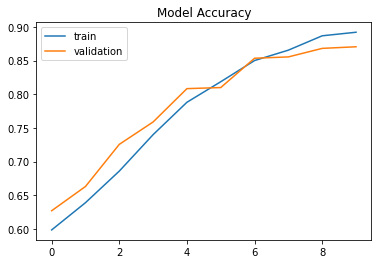

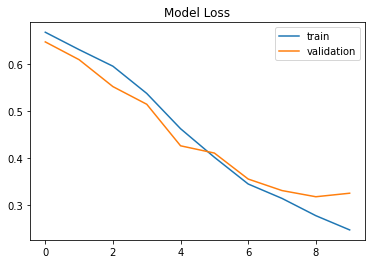

In [43]:
plt.title('Model Accuracy')
plt.plot(hist.history['accuracy'],label='train')
plt.plot(hist.history['val_accuracy'],label='validation')
plt.legend()
plt.show()
plt.title('Model Loss')
plt.plot(hist.history['loss'],label='train')
plt.plot(hist.history['val_loss'],label='validation')
plt.legend()
plt.show()

Model looks well tuned so we can move further.

In [44]:
pred=model.predict(X_test)

As the final output is a probablity so we need to categorize it.

In [45]:
for i in pred:
  print(i)
  print(type(i))
  break

[0.03084722]
<class 'numpy.ndarray'>


In [46]:
y_pred=[]
for i in pred:
  if i>=0.5:
    y_pred.append(int(1))
  else:
    y_pred.append(int(0))

In [57]:
print('test data accuracy : ',accuracy_score(y_test,y_pred))

test data accuracy :  0.862970297029703


In [47]:
decoder=['Car','Truck']

### Checking with the prediction with the actual pictures.

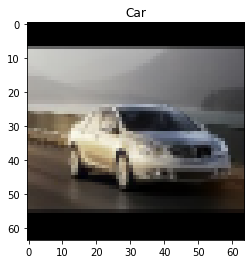

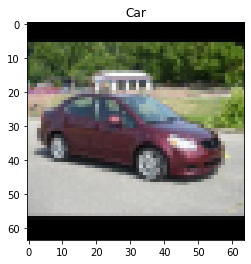

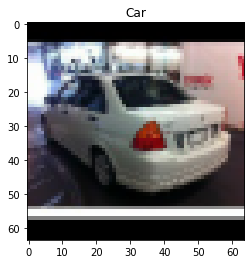

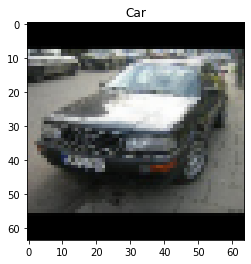

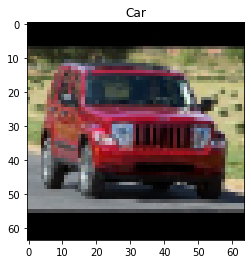

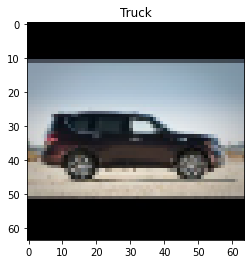

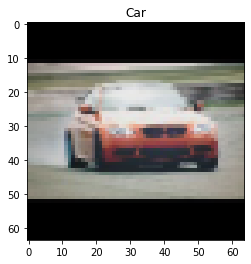

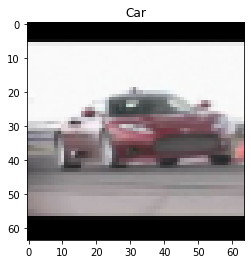

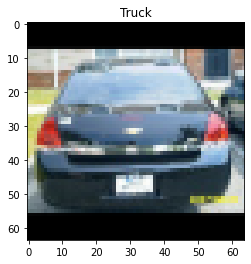

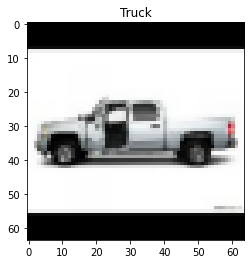

In [52]:
for i in range(10):
  plt.title(decoder[y_pred[i*200]])
  plt.imshow(X_test[i*200].reshape(64,64,3))
  plt.show()

# Confusion Matrix :
---

(<Figure size 216x216 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f76a031a400>)

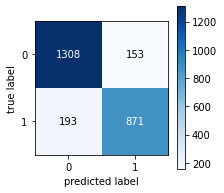

In [53]:
train_mat=confusion_matrix(y_test,y_pred)
plot_confusion_matrix(train_mat,figsize=(3,3),colorbar=True)

Checking the wrong predicted ones and their quality.

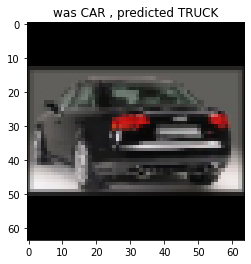

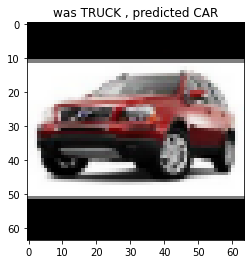

In [56]:
x=0
y=0
for i in range(len(y_pred)):
  if y_pred[i]==1 and y_test[i]==0 and x==0:
    plt.title('was CAR , predicted TRUCK')
    plt.imshow(X_test[i].reshape(64,64,3))
    plt.show()
    x+=1
  elif y_pred[i]==0 and y_test[i]==1 and y==0:
    plt.title('was TRUCK , predicted CAR')
    plt.imshow(X_test[i].reshape(64,64,3))
    plt.show()
    y+=1
  elif x>0 and y>0:
    break
  

we can see that the model is well tuned , the wrong predicted images are tougher to predict . So we can say the model works optimally.

## HURRAH !
---
We've completed the binary classification task with a very good accuracy.

You can visit my other works at [github](https://github.com/sagnik1511) or in [kaggle](https://kaggle.com/sahnik1511).

Do **UPVOTE** in kaggle and **STAR** in github my projects to keep me going :)